<a href="https://colab.research.google.com/github/MohamedElashry18/Project-laptop-powerbi/blob/main/LABTOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : mohamed elsayed abdelatif elashry

i want model Linear Regression (Data1  ) + dashboard(power bi  questions that i need  )
i will ask you to make Specific preprocessing in data by python.
if you will use preprocessing of data by python and save it and will upload to power bi without make transform ok , but take care if you did encoding for data will replace it with category to show useful visualization (so the solution save data before encoding )


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/laptop_prices.csv")

In [ ]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [ ]:
df.tail()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [ ]:
df.sample(5)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
10616,Dell,Intel i7,16,1TB HDD,Integrated,15.6,1920x1080,7.9,2.34,Windows,963.41
5416,Samsung,Intel i5,32,1TB HDD,AMD Radeon RX 6800,14.0,3840x2160,10.1,1.64,FreeDOS,2101.11
7973,HP,AMD Ryzen 3,8,256GB SSD,AMD Radeon RX 6600,14.0,2560x1440,7.3,2.70,macOS,1152.75
7391,Samsung,Intel i7,8,256GB SSD,AMD Radeon RX 6800,14.0,1920x1080,6.8,1.79,macOS,1181.12
11761,Dell,Intel i3,64,1TB SSD,AMD Radeon RX 6600,17.3,2560x1440,11.5,1.93,Windows,2683.44


In [ ]:
print(f"Number of rows : {df.shape[0]} \nNumber of columns : {df.shape[1]}")

Number of rows : 11768 
Number of columns : 11


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [ ]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [ ]:
df.describe(include='object')

,Brand,Processor,Storage,GPU,Resolution,Operating System
count,11768,11768,11768,11768,11768,11768
unique,10,8,5,7,4,4
top,Apple,Intel i3,512GB SSD,Nvidia RTX 2060,3840x2160,Windows
freq,1262,1570,2420,1746,2977,2954


In [ ]:
print(df['GPU'].unique())

['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']


In [ ]:
print(df['Storage'].unique())

['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']


In [ ]:
print(df['Operating System'].unique())

['FreeDOS' 'Linux' 'Windows' 'macOS']


In [ ]:
print(df['Brand'].unique())

['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI']


In [ ]:
# Calculate Q1 and Q3 for the 'Price' column
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers in the 'Price' column

outliers_price = df[(df['Price ($)'] < lower_bound) | (df['Price ($)'] > upper_bound)]


# Remove outliers from 'Price'
df_no_outliers = df[(df['Price ($)'] >= lower_bound) & (df['Price ($)'] <= upper_bound)]

# Check the shape of the data after removing the outliers
print(f"Number of outliers in the 'Price' column: {outliers_price.shape[0]}")
print(f"Shape of the data after removing outliers: {df_no_outliers.shape}")

Number of outliers in the 'Price' column: 605
Shape of the data after removing outliers: (11163, 11)


In [ ]:

le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Processor'] = le.fit_transform(df['Processor'])
df['Operating System'] = le.fit_transform(df['Operating System'])
df['GPU'] = le.fit_transform(df['GPU'])
df['Resolution'] = le.fit_transform(df['Resolution'])
df['Storage'] = le.fit_transform(df['Storage'])

In [ ]:
correlation = df.corr()["Price ($)"].sort_values(ascending=False)
print("Correlation with Price:")
print(correlation)

Correlation with Price:
Price ($)               1.000000
RAM (GB)                0.616221
Resolution              0.415081
Processor               0.210850
Screen Size (inch)      0.069829
Storage                 0.059793
GPU                     0.038280
Battery Life (hours)    0.009778
Brand                   0.003407
Weight (kg)             0.002431
Operating System       -0.001183
Name: Price ($), dtype: float64


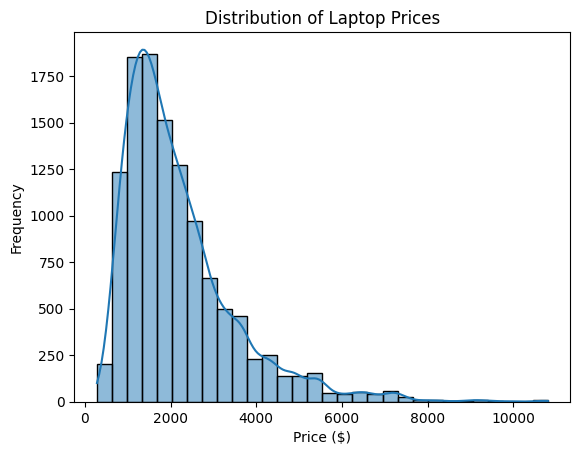

In [ ]:
sns.histplot(df["Price ($)"], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
average_prices = df.groupby('Processor')['Price ($)'].mean()
print(average_prices)

Processor
0    1534.919567
1    1862.017925
2    2277.774418
3    3067.286753
4    1555.673013
5    1829.125983
6    2300.938979
7    3084.511834
Name: Price ($), dtype: float64


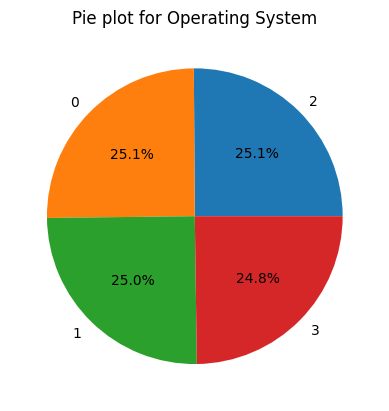

In [ ]:
sizes = df['Operating System'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title("Pie plot for Operating System")
plt.show()

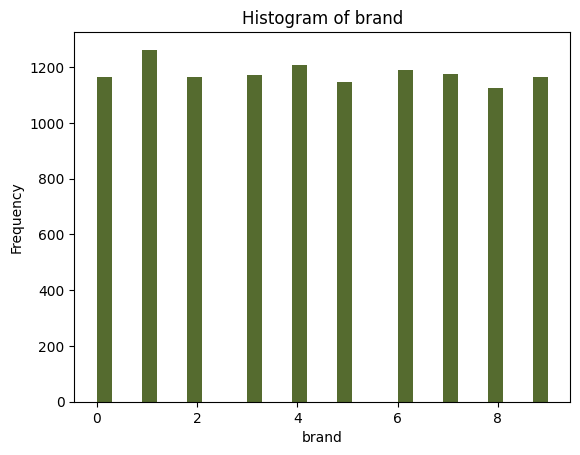

In [ ]:
plt.hist(df['Brand'], bins=30, color='darkolivegreen')
plt.title("Histogram of brand")
plt.xlabel("brand")
plt.ylabel("Frequency")
plt.show()

<ipython-input-230-b3d80ce21a15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Storage',data=df ,  palette='coolwarm')


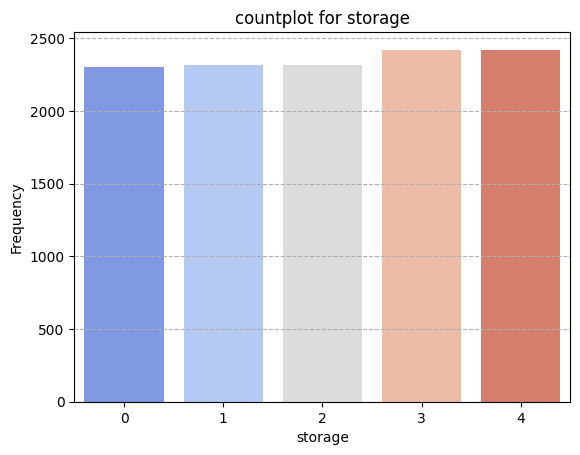

In [ ]:
sns.countplot(x='Storage',data=df ,  palette='coolwarm')
plt.title("countplot for storage")
plt.xlabel("storage")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

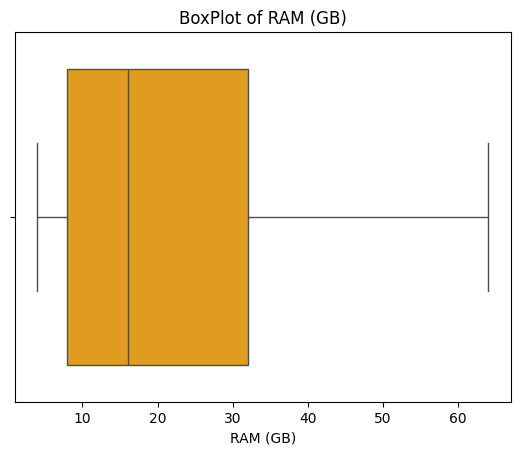

In [ ]:
sns.boxplot(x=df['RAM (GB)'], color='orange')
plt.title("BoxPlot of RAM (GB)")
plt.show()

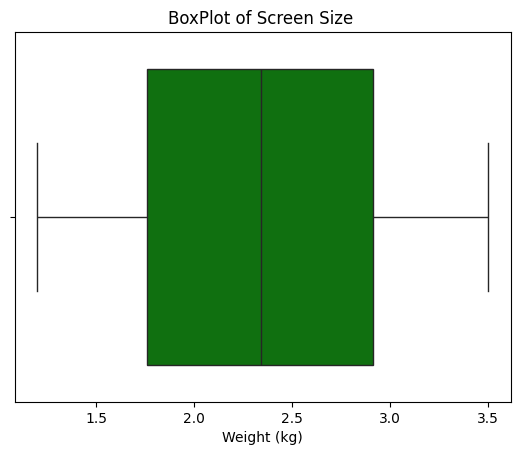

In [ ]:
sns.boxplot(x=df['Weight (kg)'], color='green')
plt.title("BoxPlot of Screen Size ")
plt.show()

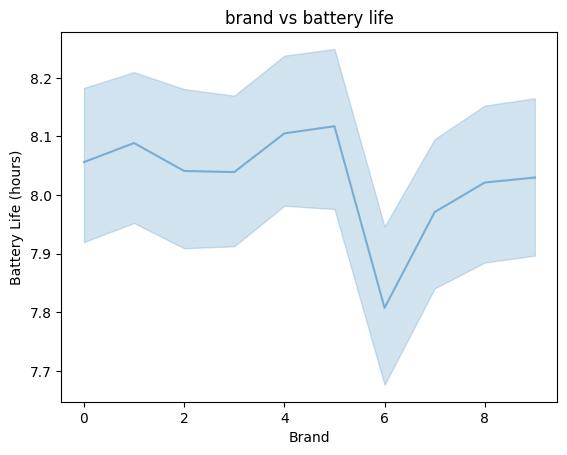

In [ ]:
sns.lineplot(x='Brand', y='Battery Life (hours)', data=df, alpha=0.5)
plt.title('brand vs battery life')
plt.show()

In [ ]:
X = df.drop(columns=["Price ($)"]);
y = df["Price ($)"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 636881.51
R-squared: 0.61


In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 362386.81
R-squared (R²): 0.78


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=60, random_state=42)


In [ ]:
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=60, random_state=42)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-squared (R²): {r2:.2f}")

 Mean Squared Error (MSE): 362386.81
 R-squared (R²): 0.78
